In [54]:
import sys
sys.path.append("../../")

original traj


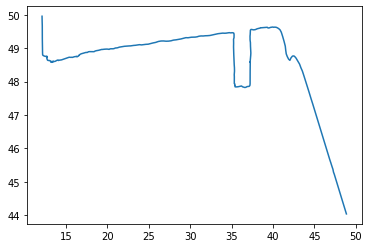

In [55]:
import src.genTestTraj as gen
import numpy as np
import matplotlib.pyplot as plt
import src.util as util
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import src.genDeltaX as genDeltaX
import src.mechanism as mechanism

def perturb_trajectory(oh_traj, traj_generator, delta, epsilon, mec, iter_num=20):
    reports = {"trajectories": [], "distance": []}
    
    for _ in range(iter_num):
        
        prior_distribution = oh_traj[0]
        deltax_generator = genDeltaX.DeltaXGenerator()
        perturbed_trajectory = np.zeros((len(oh_traj) ,2))
        distances = []

        for i, oh_loc in enumerate(oh_traj):
            #print("true state:", np.where(oh_loc==1)[0][0])

            pos_dist = traj_generator.compute_posterior_distribution(prior_distribution)
            state_nos, oh_deltaXs = deltax_generator.generate(pos_dist, delta=delta)

            coords = traj_generator.process(oh_deltaXs)
            true_loc = traj_generator.process(np.array([oh_loc]))[0]

            mec.load(coords, state_nos)
            mec.build_distribution(epsilon)

            perturbed_loc = mec.perturb(true_loc)
            perturbed_trajectory[i,:] = perturbed_loc

            #print("true:", true_loc, "perturbed_loc", perturbed_loc, "\n")
            prior_distribution = mec.inference(pos_dist, perturbed_loc)

            distances.append(np.linalg.norm(true_loc - perturbed_loc))
            
        reports["trajectories"].append(perturbed_trajectory)
        reports["distance"].append(distances)
        
        
    return reports

def compare_distances(im_reports, lm_reports):
    im_distances = np.average(im_reports["distance"], axis=0)
    lm_distances = np.average(lm_reports["distance"], axis=0)
    time_stamps = list(range(len(im_distances)))
    
    plt.plot(time_stamps, im_distances, label="PIM")
    plt.plot(time_stamps, lm_distances, label="LM")
    plt.show()

print("original traj")
original = np.loadtxt("../../temp/geolife_test_traj.txt")[:500]    
plt.plot(original[:,0],original[:,1])
plt.show()

In [56]:
query = np.loadtxt("../../data/locQuery.txt")

data = "../../temp/data/testTraj_4thRing.txt"
traj = util.load_traj(data)
oh_traj = util.make_oh_traj(traj, query.shape[1])

epsilon = 1
delta = 1e-2

generator = gen.TrajectoryGenerator()
generator.load("../../temp/data/TransMat_4thRing.txt", query)

In [ ]:
np.random.seed(0)
im = mechanism.PlanarIsotropicMechanism()
im_reports = perturb_trajectory(oh_traj, generator, delta, epsilon, im)

np.random.seed(0)
lm = mechanism.LaplaceMechanism()
lm_reports = perturb_trajectory(oh_traj, generator, delta, epsilon, lm)

num possible location: 3 [2412 2461 2462]
num possible location: 3 [2412 2461 2462]
num possible location: 3 [2412 2461 2462]
num possible location: 3 [2412 2461 2462]
num possible location: 4 [2412 2460 2461 2462]
num possible location: 4 [2412 2460 2461 2462]
num possible location: 4 [2412 2460 2461 2462]
num possible location: 4 [2412 2460 2461 2462]
num possible location: 4 [2412 2460 2461 2462]
num possible location: 4 [2412 2460 2461 2462]
num possible location: 4 [2412 2460 2461 2462]
num possible location: 4 [2412 2460 2461 2462]
num possible location: 4 [2412 2460 2461 2462]
num possible location: 4 [2412 2460 2461 2462]
num possible location: 5 [2411 2412 2460 2461 2462]
num possible location: 5 [2411 2412 2460 2461 2462]
num possible location: 5 [2411 2412 2460 2461 2462]
num possible location: 5 [2411 2412 2460 2461 2462]
num possible location: 5 [2411 2412 2460 2461 2462]
num possible location: 5 [2411 2412 2460 2461 2462]
num possible location: 5 [2411 2412 2460 2461 2462

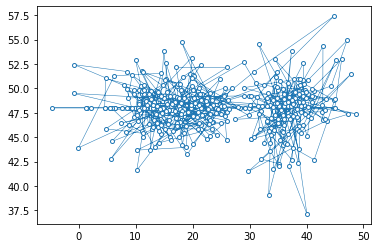

In [35]:
plt.plot(perturbed_trajectory[:,0], perturbed_trajectory[:,1], marker="o",markerfacecolor='#ffffff', ms=4, lw=0.5)
plt.show()

true state: 2462
num possible location: 3 [2412 2461 2462]
true: [12.05 49.  ] perturbed_loc [12.25031829 50.09742799] 

true state: 2462
num possible location: 3 [2412 2461 2462]
true: [12.05 49.  ] perturbed_loc [12.49864813 49.18340524] 

true state: 2462
num possible location: 3 [2412 2461 2462]
true: [12.05 49.  ] perturbed_loc [11.7269062  49.67277362] 

true state: 2462
num possible location: 4 [2412 2460 2461 2462]
true: [12.05 49.  ] perturbed_loc [11.65667039 53.51461284] 

true state: 2462
num possible location: 4 [2412 2460 2461 2462]
true: [12.05 49.  ] perturbed_loc [19.78420675 48.2170081 ] 

true state: 2462
num possible location: 4 [2412 2460 2461 2462]
true: [12.05 49.  ] perturbed_loc [14.63345943 49.17560444] 

true state: 2462
num possible location: 4 [2412 2460 2461 2462]
true: [12.05 49.  ] perturbed_loc [12.48154272 54.62006557] 

true state: 2462
num possible location: 4 [2412 2460 2461 2462]
true: [12.05 49.  ] perturbed_loc [ 6.29330956 43.84571611] 

true st

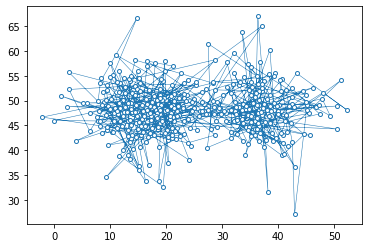

In [15]:
plt.plot(perturbed_trajectory[:,0], perturbed_trajectory[:,1], marker="o",markerfacecolor='#ffffff', ms=4, lw=0.5)
plt.show()

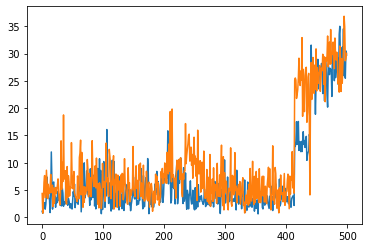

In [49]:
compare_distances(im_reports, lm_reports)